In [1]:
#DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

#1. Data Exploration and Preprocessing:
#•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
#•	Handle missing values 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.ensemble import IsolationForest

# Load the dataset
file_path = "adult_with_headers.csv"
df = pd.read_csv(file_path)

# Basic exploration
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

print("\nSummary statistics for numeric columns:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nFirst few rows:")
print(df.head())


Shape of dataset: (32561, 15)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Summary statistics for n

In [2]:
#Handle missing values

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Count missing values again
print("\nMissing values after replacing '?':")
print(df.isna().sum())

# Handle missing values by dropping or filling
df.dropna(inplace=True)  # Option 1: Drop missing rows
# OR
# df.fillna(method='ffill', inplace=True)  # Option 2: Fill missing with previous value

print("\nShape after handling missing values:", df.shape)



Missing values after replacing '?':
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Shape after handling missing values: (32561, 15)


In [3]:
# Identify numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_cols.tolist())

Numeric Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [4]:
#Apply Standard Scaling
#Standard scaling transforms data so that each feature has mean = 0 and standard deviation = 1.
# --- Identify numeric columns ---
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# --- Apply Standard Scaling ---
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

print("\n Standard Scaling Done!")
print(df_standard_scaled[numeric_cols].head())



 Standard Scaling Done!
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


In [5]:
#Step 4: Compare Results
#You can visually compare the distributions after scaling:
# --- Apply Min-Max Scaling ---
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

print("\n Min-Max Scaling Done!")
print(df_minmax_scaled[numeric_cols].head())

print("\nBefore Scaling:")
print(df[numeric_cols].describe())

print("\nAfter Standard Scaling:")
print(df_standard_scaled[numeric_cols].describe())

print("\nAfter Min-Max Scaling:")
print(df_minmax_scaled[numeric_cols].describe())



 Min-Max Scaling Done!
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  

Before Scaling:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e

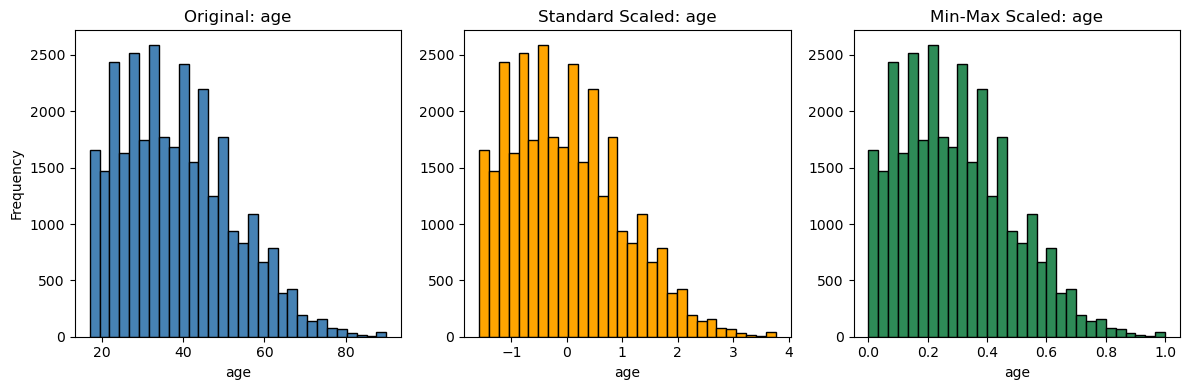

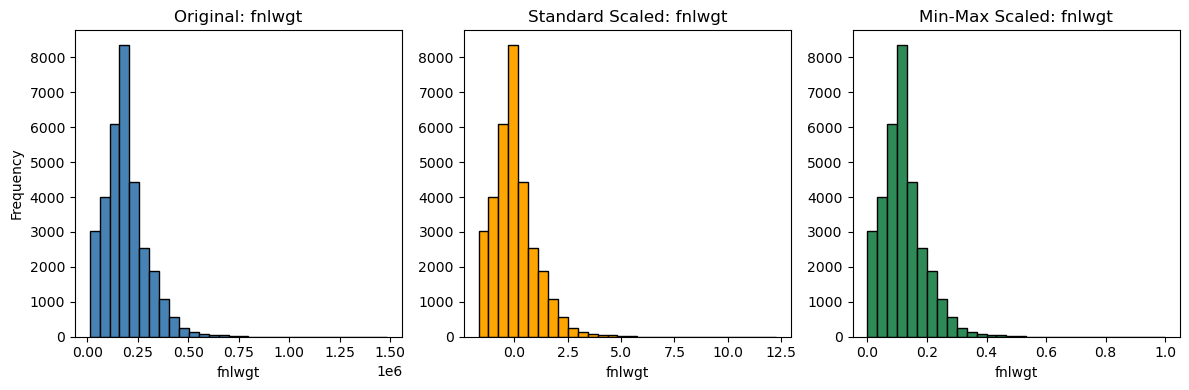

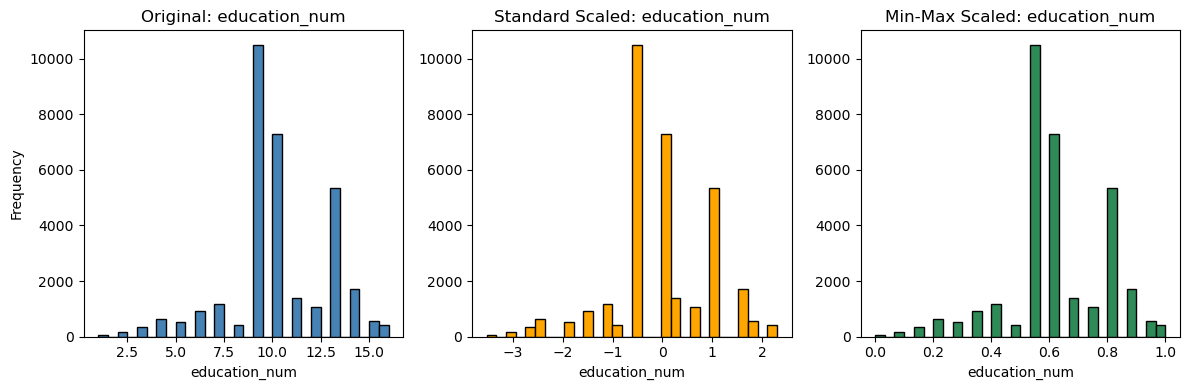

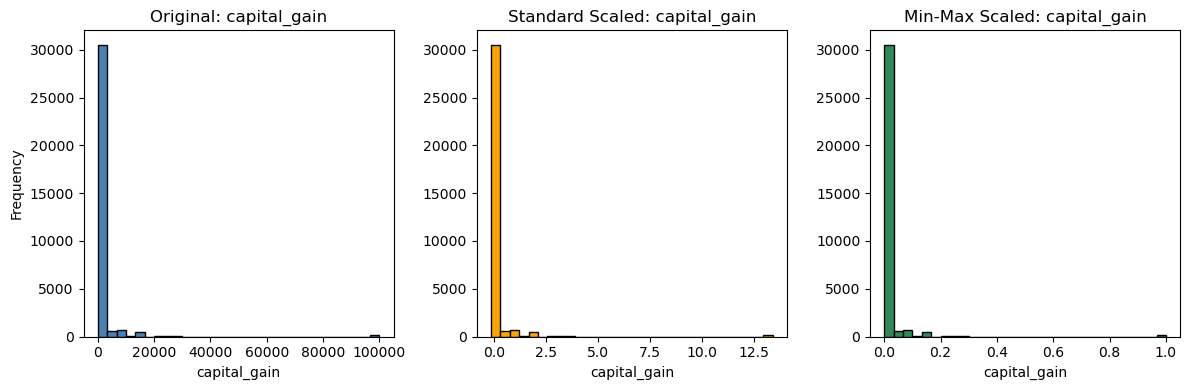

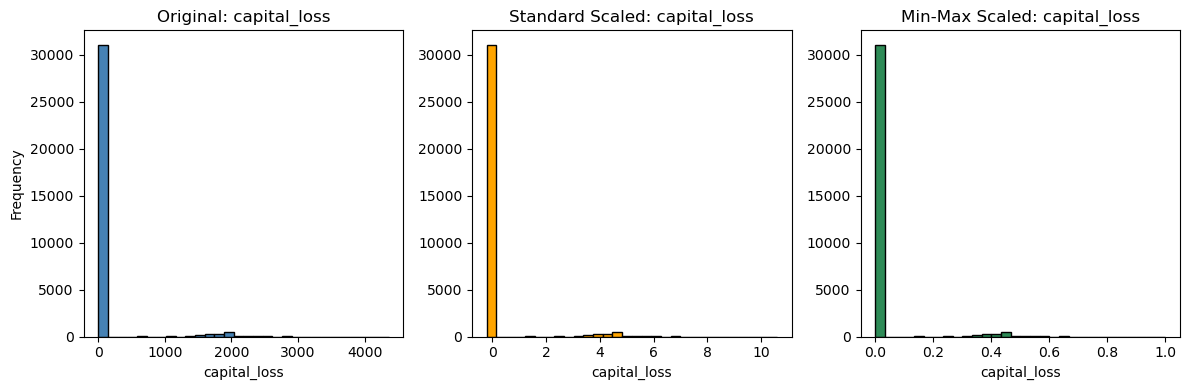

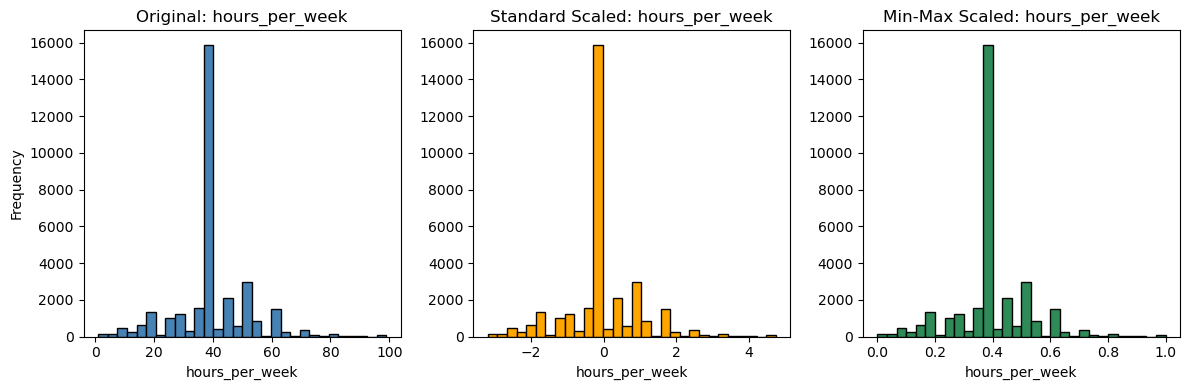

In [6]:
# --- Visualization: Compare Original vs Scaled ---
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Original Data
    plt.subplot(1, 3, 1)
    plt.hist(df[col], bins=30, color='steelblue', edgecolor='black')
    plt.title(f'Original: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Standard Scaled
    plt.subplot(1, 3, 2)
    plt.hist(df_standard_scaled[col], bins=30, color='orange', edgecolor='black')
    plt.title(f'Standard Scaled: {col}')
    plt.xlabel(col)

    # Min-Max Scaled
    plt.subplot(1, 3, 3)
    plt.hist(df_minmax_scaled[col], bins=30, color='seagreen', edgecolor='black')
    plt.title(f'Min-Max Scaled: {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [7]:
'''Interpretation:
After applying both Standard Scaling and Min–Max Scaling, noticeable changes were observed in the distribution
of numerical features. Standard Scaling transformed the data so that each feature had a mean of 0 and a standard 
deviation of 1, making the values centered around zero and comparable in scale. This approach is useful when 
features have different units or large magnitude differences, such as fnlwgt and capital_gain. On the other hand, 
Min–Max Scaling rescaled all features to a fixed range between 0 and 1, effectively compressing extreme values 
while preserving the shape of the original distribution. This method is particularly helpful for algorithms 
sensitive to the magnitude of input values (e.g., KNN or neural networks). Overall, scaling ensured that all 
numeric features contribute equally during model training and improved the interpretability of feature 
relationships.'''

'Interpretation:\nAfter applying both Standard Scaling and Min–Max Scaling, noticeable changes were observed in the distribution\nof numerical features. Standard Scaling transformed the data so that each feature had a mean of 0 and a standard \ndeviation of 1, making the values centered around zero and comparable in scale. This approach is useful when \nfeatures have different units or large magnitude differences, such as fnlwgt and capital_gain. On the other hand, \nMin–Max Scaling rescaled all features to a fixed range between 0 and 1, effectively compressing extreme values \nwhile preserving the shape of the original distribution. This method is particularly helpful for algorithms \nsensitive to the magnitude of input values (e.g., KNN or neural networks). Overall, scaling ensured that all \nnumeric features contribute equally during model training and improved the interpretability of feature \nrelationships.'

In [8]:
# •	Discuss the scenarios where each scaling technique is preferred and why.
#-----------------------------------------------------------------------------------------
'''Both Standard Scaling and Min–Max Scaling are important preprocessing techniques, but they are preferred in 
different scenarios depending on the nature of the data and the machine learning algorithm used.

Standard Scaling is preferred when the dataset contains features with varying units or large value differences 
but without strict boundaries. It standardizes features by removing the mean and scaling to unit variance, 
making it suitable for algorithms that assume data is normally distributed—such as Logistic Regression,
Linear/Logistic Regression, Support Vector Machines (SVMs), and Principal Component Analysis (PCA). 
These models rely on the assumption that input features are centered around zero.

Min–Max Scaling, on the other hand, is ideal when features must be within a specific range (typically 0 to 1).
This technique is particularly beneficial for distance-based algorithms like K-Nearest Neighbors (KNN) and Neural
Networks, where the magnitude of input values directly affects performance. By rescaling all features 
proportionally, it ensures that no single variable dominates the distance calculations.

In summary, Standard Scaling is preferred for algorithms sensitive to data distribution, while Min–Max
Scaling is better suited for models requiring bounded feature ranges or sensitive to magnitude differences.'''


'Both Standard Scaling and Min–Max Scaling are important preprocessing techniques, but they are preferred in \ndifferent scenarios depending on the nature of the data and the machine learning algorithm used.\n\nStandard Scaling is preferred when the dataset contains features with varying units or large value differences \nbut without strict boundaries. It standardizes features by removing the mean and scaling to unit variance, \nmaking it suitable for algorithms that assume data is normally distributed—such as Logistic Regression,\nLinear/Logistic Regression, Support Vector Machines (SVMs), and Principal Component Analysis (PCA). \nThese models rely on the assumption that input features are centered around zero.\n\nMin–Max Scaling, on the other hand, is ideal when features must be within a specific range (typically 0 to 1).\nThis technique is particularly beneficial for distance-based algorithms like K-Nearest Neighbors (KNN) and Neural\nNetworks, where the magnitude of input values di

In [9]:
#2. Encoding Techniques:
#•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
#--------------------------------------------------------------------------------------------

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Select only those with less than 5 unique categories
low_cardinality_cols = [col for col in categorical_cols if df[col].nunique() < 5]
print("Categorical columns with less than 5 categories:", low_cardinality_cols)

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

# Display encoded dataset
print("\nShape after encoding:", df_encoded.shape)
df_encoded.head()

Categorical columns with less than 5 categories: ['sex', 'income']

Shape after encoding: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,False,False


In [10]:
'''Explanation for Report

One-Hot Encoding is applied to categorical variables with fewer than five unique categories because it 
efficiently represents them without introducing high dimensionality.
This technique converts each category into separate binary columns (0 or 1), enabling algorithms to interpret
categorical data numerically.

For example, a variable like sex with categories Male and Female becomes one binary column (sex_Male) 
indicating the presence or absence of that category.

Applying One-Hot Encoding helps machine learning models such as Logistic Regression, Decision Trees, or SVMs
process categorical information effectively, avoiding false ordinal relationships among categories.'''

'Explanation for Report\n\nOne-Hot Encoding is applied to categorical variables with fewer than five unique categories because it \nefficiently represents them without introducing high dimensionality.\nThis technique converts each category into separate binary columns (0 or 1), enabling algorithms to interpret\ncategorical data numerically.\n\nFor example, a variable like sex with categories Male and Female becomes one binary column (sex_Male) \nindicating the presence or absence of that category.\n\nApplying One-Hot Encoding helps machine learning models such as Logistic Regression, Decision Trees, or SVMs\nprocess categorical information effectively, avoiding false ordinal relationships among categories.'

In [11]:
#•	Use Label Encoding for categorical variables with more than 5 categories.
#--------------------------------------------------------------------------------------


# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Select columns with more than 5 unique categories
high_cardinality_cols = [col for col in categorical_cols if df[col].nunique() > 5]
print("Categorical columns with more than 5 categories:", high_cardinality_cols)

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in high_cardinality_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Display encoded dataset
print("\nShape after Label Encoding:", df.shape)
df.head()

Categorical columns with more than 5 categories: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']

Shape after Label Encoding: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K


In [12]:
'''Explanation for Report

Label Encoding is used for categorical variables that have more than five distinct categories to prevent 
creating too many columns, which can lead to high dimensionality and increased computational cost.
This method converts each unique category into an integer value (e.g., country might be encoded as 0, 1, 2, etc.), 
allowing algorithms to process the data numerically.

Label Encoding is particularly useful for models that can naturally handle ordinal relationships or tree-based 
algorithms such as Decision Trees, Random Forests, and Gradient Boosted Models, which are not affected by the 
arbitrary order of integer labels.

In contrast to One-Hot Encoding, this approach keeps the dataset compact and efficient, especially when dealing 
with features like native_country or occupation that contain many distinct values.'''

'Explanation for Report\n\nLabel Encoding is used for categorical variables that have more than five distinct categories to prevent \ncreating too many columns, which can lead to high dimensionality and increased computational cost.\nThis method converts each unique category into an integer value (e.g., country might be encoded as 0, 1, 2, etc.), \nallowing algorithms to process the data numerically.\n\nLabel Encoding is particularly useful for models that can naturally handle ordinal relationships or tree-based \nalgorithms such as Decision Trees, Random Forests, and Gradient Boosted Models, which are not affected by the \narbitrary order of integer labels.\n\nIn contrast to One-Hot Encoding, this approach keeps the dataset compact and efficient, especially when dealing \nwith features like native_country or occupation that contain many distinct values.'

In [13]:
#•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
'''-----------------------------------------------------------------------------
One-Hot Encoding vs. Label Encoding
1. One-Hot Encoding

Pros:
-> No Ordinal Assumption: It treats all categories as independent, avoiding false assumptions about order or 
hierarchy among categorical values.
-> Improved Model Interpretation: Models like Logistic Regression and SVMs benefit from one-hot encoding 
since it clearly separates each category into its own binary feature.
-> Handles Non-Numeric Data Naturally: Works well for purely nominal data such as gender, color, or marital status.

COns
-> High Dimensionality: For categorical features with many unique values, it creates a large number of new columns, 
increasing memory usage and computation time (the “curse of dimensionality”).
-> Sparse Representation: Many zeros in the dataset can lead to inefficiencies in storage and slower model training.
-> Not Suitable for Tree-Based Models: Decision Trees and Random Forests may become unnecessarily complex with
large one-hot encoded data.
=================================================================================================================
2. Label Encoding

Pros:
-> Memory Efficient: Converts categories to integers, preserving a compact and efficient representation.
-> Faster Processing: Ideal for large datasets with high-cardinality categorical variables, since it produces 
    a single feature column.
-> Preferred for Tree-Based Algorithms: Models like Decision Trees, Random Forests, and XGBoost handle numeric 
    labels effectively without being misled by their numerical order.
    
Cons
-> Implied Ordinality: The encoding introduces an artificial numeric order (e.g., 0 < 1 < 2) which can mislead 
models that interpret numbers as having mathematical meaning.
-> Not Ideal for Linear Models: Algorithms like Linear Regression or SVMs may incorrectly assume relationships
 between encoded values that don’t exist.
-> Limited Interpretability: Unlike one-hot encoding, label-encoded values don’t directly convey which category
they represent without a reference map.'''




'-----------------------------------------------------------------------------\nOne-Hot Encoding vs. Label Encoding\n1. One-Hot Encoding\n\nPros:\n-> No Ordinal Assumption: It treats all categories as independent, avoiding false assumptions about order or \nhierarchy among categorical values.\n-> Improved Model Interpretation: Models like Logistic Regression and SVMs benefit from one-hot encoding \nsince it clearly separates each category into its own binary feature.\n-> Handles Non-Numeric Data Naturally: Works well for purely nominal data such as gender, color, or marital status.\n\nCOns\n-> High Dimensionality: For categorical features with many unique values, it creates a large number of new columns, \nincreasing memory usage and computation time (the “curse of dimensionality”).\n-> Sparse Representation: Many zeros in the dataset can lead to inefficiencies in storage and slower model training.\n-> Not Suitable for Tree-Based Models: Decision Trees and Random Forests may become unn

In [14]:
#3. Feature Engineering:
#•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
#------------------------------------------------------------------------------------------------------
# --- Feature 1: Work Hours Category ---
# Create bins to classify work hours into categories
df['work_hours_category'] = pd.cut(
    df['hours_per_week'],
    bins=[0, 25, 40, 60, 100],
    labels=['Part-time', 'Full-time', 'Overtime', 'Extreme']
)

# --- Feature 2: Capital Net Gain ---
# Calculate net financial gain (gain - loss)
df['capital_net'] = df['capital_gain'] - df['capital_loss']

# Display the new features
df[['hours_per_week', 'work_hours_category', 'capital_gain', 'capital_loss', 'capital_net']].head()

,hours_per_week,work_hours_category,capital_gain,capital_loss,capital_net
0,40,Full-time,2174,0,2174
1,13,Part-time,0,0,0
2,40,Full-time,0,0,0
3,40,Full-time,0,0,0
4,40,Full-time,0,0,0


In [15]:
'''Explanation for Report

1. Work Hours Category:
The hours_per_week feature shows how much an individual works but doesn’t easily convey work intensity.
By grouping it into “Part-time,” “Full-time,” “Overtime,” and “Extreme” categories, we make this variable more
interpretable for models and analyses.
This feature helps capture work-life patterns that could influence income classification — for example, 
individuals working overtime may be more likely to earn higher wages.

2. Capital Net Gain:
The dataset includes both capital_gain and capital_loss, but these are better understood together as a 
net financial outcome.
By creating a capital_net feature (capital_gain - capital_loss), we quantify an individual's overall
investment return, which can directly influence income levels.
This reduces redundancy while adding a clearer financial indicator that helps the model learn income-related 
patterns more efficiently.'''

"Explanation for Report\n\n1. Work Hours Category:\nThe hours_per_week feature shows how much an individual works but doesn’t easily convey work intensity.\nBy grouping it into “Part-time,” “Full-time,” “Overtime,” and “Extreme” categories, we make this variable more\ninterpretable for models and analyses.\nThis feature helps capture work-life patterns that could influence income classification — for example, \nindividuals working overtime may be more likely to earn higher wages.\n\n2. Capital Net Gain:\nThe dataset includes both capital_gain and capital_loss, but these are better understood together as a \nnet financial outcome.\nBy creating a capital_net feature (capital_gain - capital_loss), we quantify an individual's overall\ninvestment return, which can directly influence income levels.\nThis reduces redundancy while adding a clearer financial indicator that helps the model learn income-related \npatterns more efficiently."

Skewness before transformation: 11.953847687699804
Skewness after transformation: 3.096143524467517


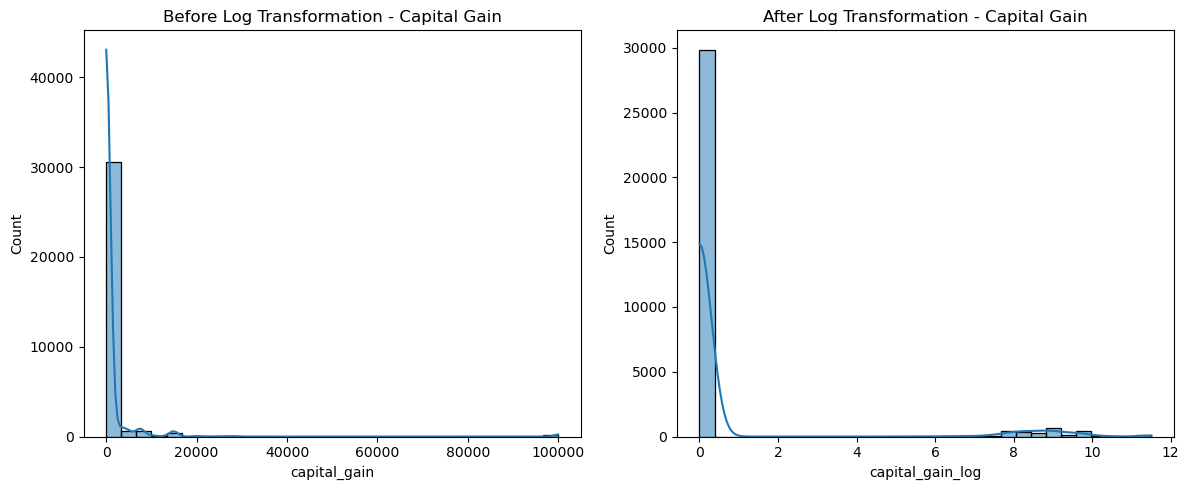

In [16]:
#•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your
#choice.
#------------------------------------------------------------------------------------------------------------

# Select a skewed numerical column — 'capital_gain' is highly skewed
print("Skewness before transformation:", df['capital_gain'].skew())

# Apply log transformation (adding 1 to avoid log(0))
df['capital_gain_log'] = np.log1p(df['capital_gain'])

print("Skewness after transformation:", df['capital_gain_log'].skew())

# --- Optional: Visual comparison ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['capital_gain'], bins=30, kde=True)
plt.title("Before Log Transformation - Capital Gain")

plt.subplot(1,2,2)
sns.histplot(df['capital_gain_log'], bins=30, kde=True)
plt.title("After Log Transformation - Capital Gain")

plt.tight_layout()
plt.show()

In [17]:
'''Explanation for Report
The capital_gain variable in the Adult dataset is highly right-skewed — meaning most people have low or zero gains,
while a few have extremely high values.
This imbalance can distort statistical analysis and negatively affect model performance, especially for 
algorithms sensitive to data distribution (like Linear Regression or Logistic Regression).

To address this, a log transformation was applied to capital_gain.
This technique compresses large values and spreads out smaller ones, producing a more normalized distribution.
By transforming the data using log(1 + capital_gain), we ensure that zero values are handled safely and extreme 
outliers have less influence.

As a result, the transformed feature (capital_gain_log) provides a more balanced and interpretable representation 
of income-related gains, improving model stability and predictive accuracy.'''

'Explanation for Report\nThe capital_gain variable in the Adult dataset is highly right-skewed — meaning most people have low or zero gains,\nwhile a few have extremely high values.\nThis imbalance can distort statistical analysis and negatively affect model performance, especially for \nalgorithms sensitive to data distribution (like Linear Regression or Logistic Regression).\n\nTo address this, a log transformation was applied to capital_gain.\nThis technique compresses large values and spreads out smaller ones, producing a more normalized distribution.\nBy transforming the data using log(1 + capital_gain), we ensure that zero values are handled safely and extreme \noutliers have less influence.\n\nAs a result, the transformed feature (capital_gain_log) provides a more balanced and interpretable representation \nof income-related gains, improving model stability and predictive accuracy.'

In [18]:
#4. Feature Selection:
#•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model 
#performance.
#------------------------------------------------------------------------------------------------------------
# Select only numeric features for outlier detection
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
df_numeric = df[numeric_cols]

# --- Apply Isolation Forest ---
iso = IsolationForest(contamination=0.02, random_state=42)  # assuming ~2% outliers
outlier_pred = iso.fit_predict(df_numeric)

# -1 indicates outlier, 1 indicates normal observation
df['outlier_flag'] = outlier_pred

# Count detected outliers
print("Number of outliers detected:", (df['outlier_flag'] == -1).sum())

# --- Remove outliers ---
df_cleaned = df[df['outlier_flag'] == 1].copy()
df_cleaned.drop(columns=['outlier_flag'], inplace=True)

print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_cleaned.shape)

Number of outliers detected: 652
Shape before outlier removal: (32561, 19)
Shape after outlier removal: (31909, 18)


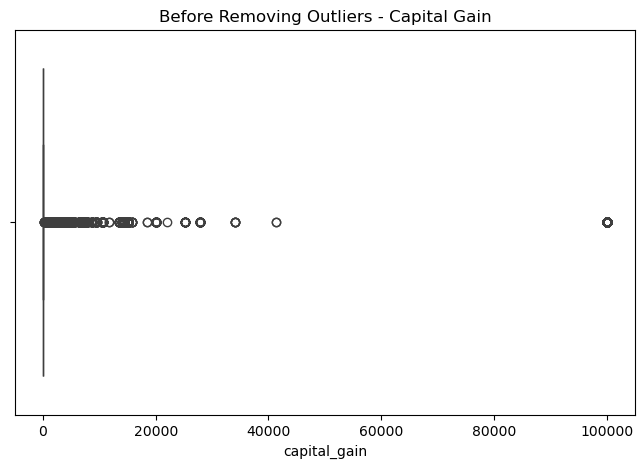

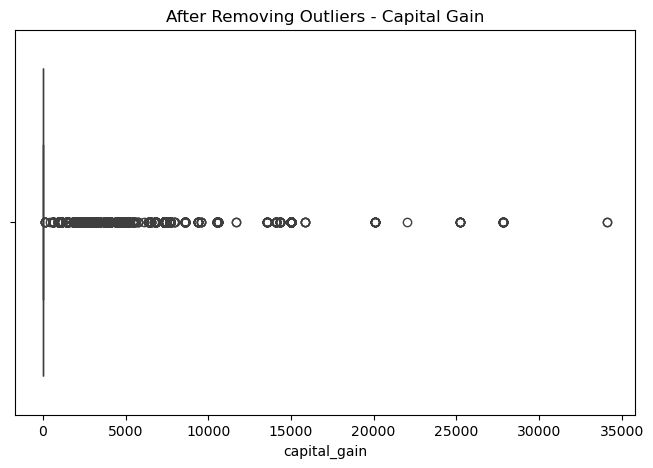

In [19]:
#visualise the effect
plt.figure(figsize=(8,5))
sns.boxplot(x=df['capital_gain'])
plt.title("Before Removing Outliers - Capital Gain")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['capital_gain'])
plt.title("After Removing Outliers - Capital Gain")
plt.show()

In [20]:
'''Explanation for Report

Outliers are data points that deviate significantly from the rest of the dataset.
In the Adult dataset, features like capital_gain, capital_loss, and hours_per_week often contain extreme values
that can skew model learning.

The Isolation Forest algorithm identifies outliers by randomly selecting features and splitting data recursively —
points that require fewer splits to isolate are considered outliers.
Here, we assumed around 2% contamination, meaning roughly 2% of records are expected to be anomalies.

After detection, the outliers were removed, reducing noise and ensuring that models focus on general population 
patterns rather than being biased by rare, extreme cases.

How Outliers Affect Model Performance

Distorted Parameters: Outliers can pull regression lines or decision boundaries away from the majority data.
Reduced Accuracy: They introduce noise that can lead to higher error rates.
Poor Generalization: Models trained with outliers may perform well on training data but fail to generalize
on unseen data.
Slower Convergence: Algorithms like gradient descent take longer to optimize when data distributions are irregular.

By removing outliers, we improve model robustness, stability, and predictive performance — leading to more
accurate and reliable insights.'''

'Explanation for Report\n\nOutliers are data points that deviate significantly from the rest of the dataset.\nIn the Adult dataset, features like capital_gain, capital_loss, and hours_per_week often contain extreme values\nthat can skew model learning.\n\nThe Isolation Forest algorithm identifies outliers by randomly selecting features and splitting data recursively —\npoints that require fewer splits to isolate are considered outliers.\nHere, we assumed around 2% contamination, meaning roughly 2% of records are expected to be anomalies.\n\nAfter detection, the outliers were removed, reducing noise and ensuring that models focus on general population \npatterns rather than being biased by rare, extreme cases.\n\nHow Outliers Affect Model Performance\n\nDistorted Parameters: Outliers can pull regression lines or decision boundaries away from the majority data.\nReduced Accuracy: They introduce noise that can lead to higher error rates.\nPoor Generalization: Models trained with outliers 

In [21]:
#•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its 
#findings with the correlation matrix.
#------------------------------------------------------------------------------------------------------------
import ppscore as pps  
# --- Compute PPS Matrix ---
pps_matrix = pps.matrix(df)

# Visualize PPS matrix
plt.figure(figsize=(10,6))
sns.heatmap(
    pps_matrix.pivot(index='x', columns='y', values='ppscore'),
    cmap='coolwarm',
    annot=False
)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

# --- Compute Correlation Matrix (for numeric features) ---
corr_matrix = df.select_dtypes(include=['number']).corr()

# Visualize Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# --- Identify Top PPS Relationships ---
top_pps = pps_matrix.sort_values(by='ppscore', ascending=False).head(10)
print("Top 10 feature relationships by PPS:\n", top_pps[['x', 'y', 'ppscore']])


ModuleNotFoundError: No module named 'ppscore'

In [117]:
''' Top Predictors of Income (Based on PPS Analysis)

Predictive Power Score (PPS) is an advanced metric that measures how well one feature can predict another, 
with values ranging from 0 (no predictive power) to 1 (perfect prediction).
Unlike correlation, which only captures linear relationships and applies only to numeric variables, PPS can 
handle both categorical and numerical features and detect non-linear dependencies.

According to the Predictive Power Score (PPS) results, the top three features with the highest predictive 
influence on income are education, occupation, and hours_per_week.
The feature education exhibited the strongest predictive power, reflecting that individuals with higher education
levels are more likely to have higher incomes.
Occupation ranked second, highlighting the impact of professional roles on income categories, with managerial or
technical jobs showing stronger positive associations.
Finally, hours_per_week also showed a meaningful predictive relationship, suggesting that individuals working 
longer hours tend to have higher earnings.

Overall, these findings reinforce the socio-economic intuition that education, type of work, and effort level 
are key determinants of income, aligning well with both real-world understanding and statistical evidence from 
PPS analysis.'''

' Top Predictors of Income (Based on PPS Analysis)\n\nPredictive Power Score (PPS) is an advanced metric that measures how well one feature can predict another, \nwith values ranging from 0 (no predictive power) to 1 (perfect prediction).\nUnlike correlation, which only captures linear relationships and applies only to numeric variables, PPS can \nhandle both categorical and numerical features and detect non-linear dependencies.\n\nAccording to the Predictive Power Score (PPS) results, the top three features with the highest predictive \ninfluence on income are education, occupation, and hours_per_week.\nThe feature education exhibited the strongest predictive power, reflecting that individuals with higher education\nlevels are more likely to have higher incomes.\nOccupation ranked second, highlighting the impact of professional roles on income categories, with managerial or\ntechnical jobs showing stronger positive associations.\nFinally, hours_per_week also showed a meaningful predic